In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
h = np.vectorize(lambda x : np.log(x))
h_inv = np.vectorize(lambda x : np.exp(x))

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df = pd.read_csv("./data_synthetic/synth_data_Mvar_poi.csv", index_col=0)
df

,X,X_1,X_2,X_3,X_4,X_5,y
0,,,,,,,
0,1,5,1,5,3,9,0.002686
1,1,3,5,10,5,6,0.002753
2,1,4,6,12,5,9,0.003596
3,1,5,7,7,4,9,0.003369
4,1,7,3,12,7,7,0.002748
...,...,...,...,...,...,...,...
145,18,126,87,142,82,116,0.000241
146,18,119,71,130,87,124,0.000385
147,18,139,74,150,82,131,0.000939


In [40]:
X = df['X'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy().reshape(-1,1)

In [41]:
X.shape, y.shape

((150, 1), (150, 1))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
regr = LinearRegression()
regr.fit(X_train, h(y_train))

y_pred = h_inv(regr.predict(X_test))

print("Coefficients: \n", regr.coef_)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Coefficients: 
 [[-0.18725436]]
Mean squared error: 8.00327868581003e-05
Coefficient of determination: -0.6492769103187612


In [44]:
y_pred.sum()

np.float64(0.22704822343099573)

In [45]:
y_test.sum()

np.float64(0.318080472)

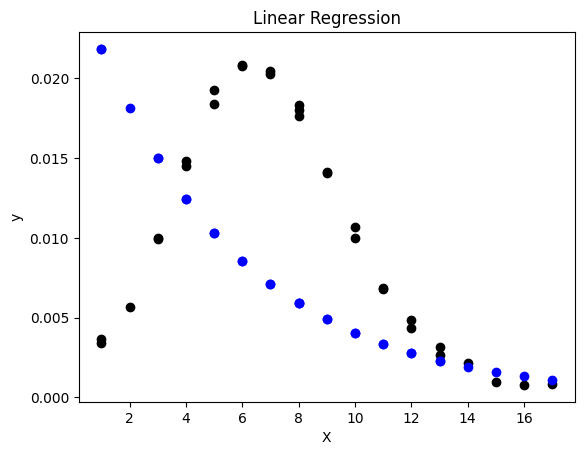

In [ ]:
plt.scatter(X_test, y_test, color="black")
plt.scatter(X_test, y_pred, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("GLM: Poisson Distributed, h = log")
plt.show()